# Dataset

## Imports

In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from utils import plot_render_mask_heatmap

import numpy as np
import os
import snook.data as sd
import torch

## Generation

In [2]:
COLORS        = sd.COLORS
BALLS         = [f"../resources/fbx/ball_{color}.fbx" for color in COLORS]
CUE           = "../resources/fbx/cue.fbx"
POOL          = "../resources/fbx/pool.fbx"
HDRI          = "../resources/hdri"

TRAIN_SAMPLES = 800
VALID_SAMPLES = 100
TEST_SAMPLES  = 100

scene         = None

In [3]:
def generate(name: str, path: str, samples: int) -> None:
    global scene
    if os.path.isdir(path):
        return
    
    if scene is None:
        scene = sd.Scene(
            sd.cFiles(BALLS, CUE, POOL, HDRI),
            sd.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
            sd.cDistances(0.1047, 0.154, 1.5, (10.0, 20.0)),
        )
    
    renders = os.path.join(path, "renders")
    data = os.path.join(path, "data")
    
    os.makedirs(renders, exist_ok=True)
    os.makedirs(data, exist_ok=True)
    
    for i in tqdm(range(samples), desc=name):
        scene.sample()
        scene.render(f"{renders}/{i}.png")
        scene.register(f"{data}/{i}.txt")

In [4]:
generate("Train", "dataset/train", TRAIN_SAMPLES)
generate("Valid", "dataset/valid", VALID_SAMPLES)
generate("Test",  "dataset/test",  TEST_SAMPLES)

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000227 sec)

	FBX import: Templates...
		Done (0.000527 sec)

	FBX import: Nodes...
		Done (0.000109 sec)

	FBX import: Connections...
		Done (0.000107 sec)

	FBX import: Meshes...
		Done (0.014255 sec)

	FBX import: Materials & Textures...
		Done (0.007503 sec)

	FBX import: Cameras & Lamps...
		Done (0.000318 sec)

	FBX import: Objects & Armatures...
		Done (0.000920 sec)

	FBX import: ShapeKeys...
		Done (0.000298 sec)

	FBX import: Animations...
		Done (0.000169 sec)

	FBX import: Assign materials...
		Done (0.000162 sec)

	FBX import: Assign textures...
		Done (0.005003 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000198 sec)

	Done (0.033779 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001475 sec)

	FBX import: Templates...
		Done (0.000095 sec)

	FBX import: Nodes...

FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000783 sec)

	FBX import: Templates...
		Done (0.000097 sec)

	FBX import: Nodes...
		Done (0.000072 sec)

	FBX import: Connections...
		Done (0.000072 sec)

	FBX import: Meshes...
		Done (0.015235 sec)

	FBX import: Materials & Textures...
		Done (0.000444 sec)

	FBX import: Cameras & Lamps...
		Done (0.000050 sec)

	FBX import: Objects & Armatures...
		Done (0.000962 sec)

	FBX import: ShapeKeys...
		Done (0.000049 sec)

	FBX import: Animations...
		Done (0.000127 sec)

	FBX import: Assign materials...
		Done (0.000089 sec)

	FBX import: Assign textures...
		Done (0.000076 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000067 sec)

	Done (0.021552 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_red.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000897 sec)

	FBX import: Templates...
		Done (0.000086 sec)

	FBX import: Nodes...


FBX version: 7400
	FBX import: Prepare...
		Done (0.000688 sec)

	FBX import: Templates...
		Done (0.000360 sec)

	FBX import: Nodes...
		Done (0.000077 sec)

	FBX import: Connections...
		Done (0.000547 sec)

	FBX import: Meshes...
		Done (9.475010 sec)

	FBX import: Materials & Textures...
		Done (0.003097 sec)

	FBX import: Cameras & Lamps...
		Done (0.000138 sec)

	FBX import: Objects & Armatures...
		Done (0.000354 sec)

	FBX import: ShapeKeys...
		Done (0.000184 sec)

	FBX import: Animations...
		Done (0.000078 sec)

	FBX import: Assign materials...
		Done (0.000769 sec)

	FBX import: Assign textures...
		Done (0.001184 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000065 sec)

	Done (9.979077 sec)

Import finished.


## Visualization

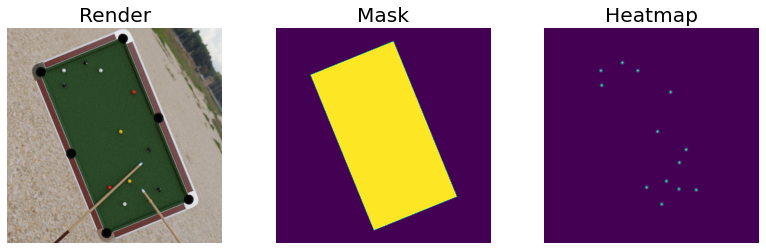

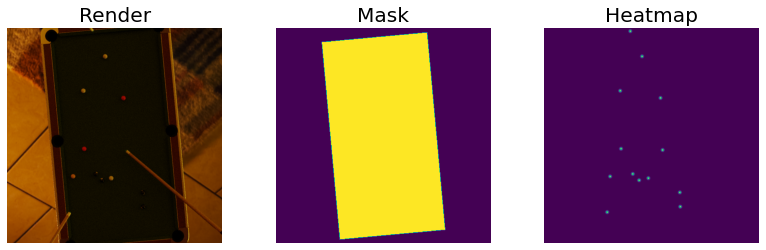

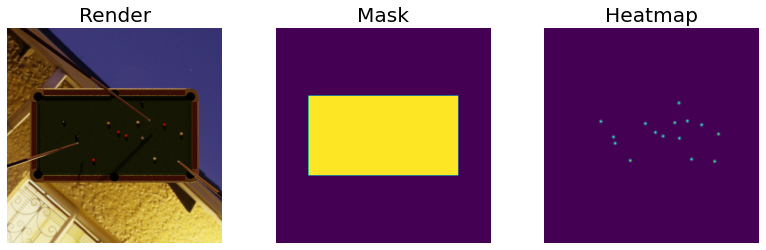

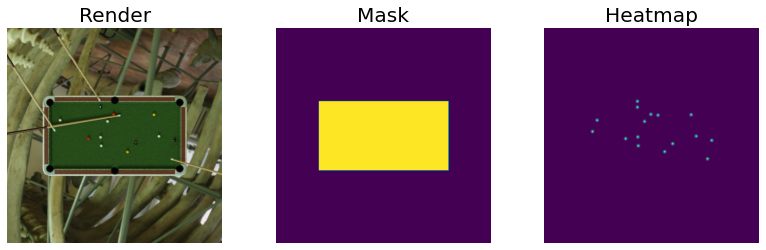

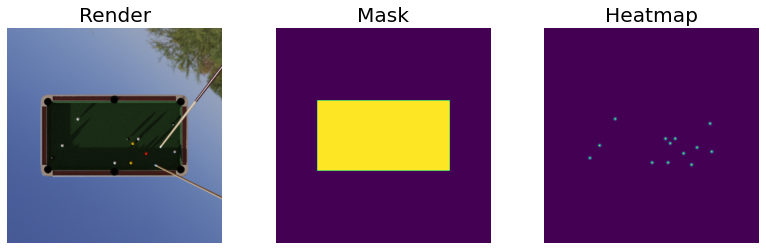

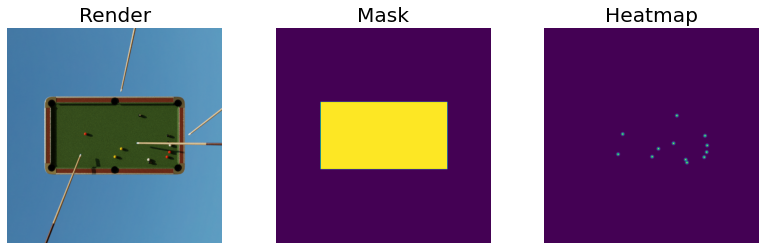

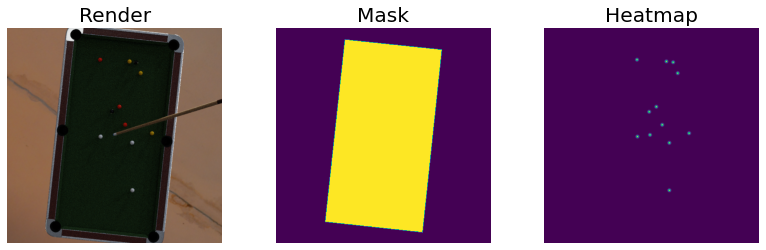

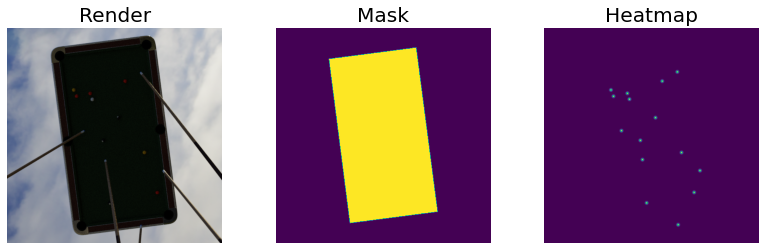

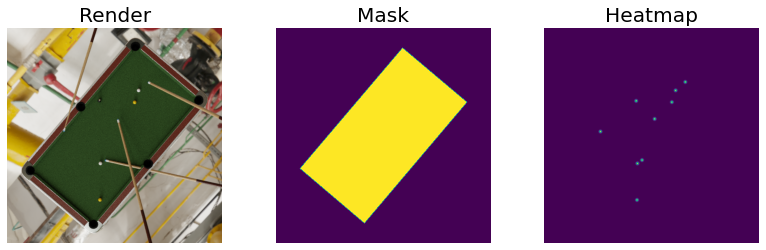

In [5]:
dataset = sd.ReMaHeDataset("dataset/test/renders", "dataset/test/data", spread=4.0)

for i, (render, mask, heatmap) in enumerate(dataset):
    if i > 8: break
    plot_render_mask_heatmap(render, mask, heatmap)